#### Introduction

The purpose of this notebook, along with 01_data_setup_example.ipynb and 02_run_example.ipynb is to provide a tutorial of how you may want to use the pop_exp pacakge functions.

Please see 01_data_setup_example.ipynb and 02_run_example.ipynb before you work through this notebook!

This notebook is going to explore the results returned by functions in PopExp that were run the previous section of the tutorial. 

In the previous section, we found the number of people affected by any US wildfire disaster in 2016, 2017, and 2018, as well as the number of people affected by any wildfire disaster by ZCTA and each wildfire disaster by ZCTA.

In this section we'll explore the results from each of these function runs.

The first function run helped us find the total number of people affected by any wildfire disaster in 2016, 2017, and 2018. To use these results, we'll first read in and plot the original wildfire disaster dataset, and then read in the results and calculate the total number of people affected by any wildfire disaster.

We'll start by loading libraries and reading in necessary data. 

In [61]:
import geopandas as gpd 
import pandas as pd
import pathlib
import sys
import matplotlib.pyplot as plt
import glob

We'll read in ZCTA data since the last three PopEx function runs involved ZCTAs, and we'll plot the wildfire disaster data over the California ZCTAs. We ran these functions to calculate national numbers, but we'll plot our exposure and results in California since it's smaller and we can see what's going on a bit better, since we're demonstrating how the functions work in this tutorial.

In [62]:
# Define the base path and data directory
base_path = pathlib.Path.cwd().parent
data_dir = base_path / "demo_data"

# Read the raw ZCTA data
zctas = gpd.read_file(data_dir / "01_raw_data" / "tl_2020_us_zcta520" / "tl_2020_us_zcta520.shp")

# Filter ZCTAs for California ZIP codes (90xxx to 96xxx)
zctas_ca = zctas[zctas['GEOID20'].str[:3].astype(int).between(900, 961)]

In [63]:
# Read in raw wildfire dataset
fires = gpd.read_file(data_dir / "01_raw_data"/ "wildfires_conus.geojson")

# Filter to wildfires in California that occurred between 2016 and 2018 (inclusive)
fires_ca = fires[(fires['wildfire_states'].str.contains('CA')) & 
                 (fires['wildfire_year'] >= 2016) & 
                 (fires['wildfire_year'] <= 2018)]

# transform zctas to the fire crs
zctas_ca = zctas_ca.to_crs(fires_ca.crs)

First, just to get an idea of our exposure that we used in the first four function runs, we'll plot all the wildfire disasters in 2016-2018 on the same plot overlayed on ZCTAs. 

/var/folders/8y/9yw138b95kjd5wjs3my5vy900000gn/T/ipykernel_34214/1195104462.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


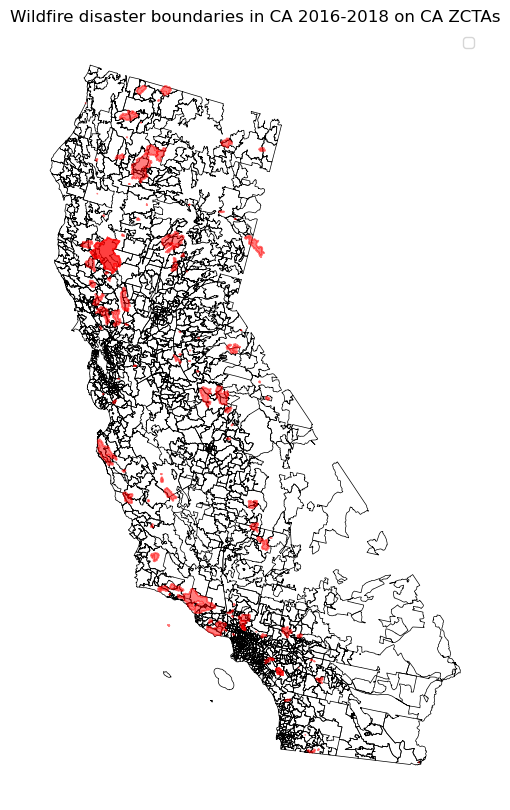

In [64]:
# plot the fires overlayed onto ZCTA boundaries
# Plot the ZCTA boundaries first
fig, ax = plt.subplots(figsize=(10, 10))
zctas_ca.boundary.plot(ax=ax, linewidth=0.5, edgecolor='black', zorder=1)

# Overlay the fire geometries with fill color
fires_ca.plot(ax=ax, color='red', alpha=0.5, edgecolor='red', zorder=2)

# Set plot title and labels
ax.set_title('Wildfire disaster boundaries in CA 2016-2018 on CA ZCTAs')
ax.set_axis_off()
ax.legend()

output_path = data_dir / "03_results" / "wildfire_zcta_plot.pdf"
plt.savefig(output_path, format='pdf', bbox_inches='tight')

plt.show()

Nice, ok. Now in the first run, we wanted to know the total people residing within 10 km of any wildfire disaster in the US in each of the years 2016-2018. Let's read in the results.
If a user ran the function this way, they'd probably be most likely interested in the total number of people affected by wildfire disasters in each year, so for this run, we'll calculate that. We'll sum over the hazard IDs, which might be concatenated because we didn't calculate a total number of people affected by unique hazard. 

In [76]:
# read output
tot_af_any_wf = pd.read_csv(data_dir / "03_results" / "num_people_affected_by_wildfire.csv")
tot_af_any_wf.head()

# group by year, and sum over number of people affected
tot_af_any_wf_grouped = tot_af_any_wf.groupby('year')['num_people_affected'].sum().reset_index()
# maybe we want to round the output
tot_af_any_wf_grouped['num_people_affected'] = tot_af_any_wf_grouped['num_people_affected'].round()
tot_af_any_wf_grouped.head()

,year,num_people_affected
0,2016,4812282.0
1,2017,10822191.0
2,2018,5378455.0


That's it for the first run. 

Moving on to the second run. 

In this run we calculated the total number of people residing within 10km of  each unique disaster in each year. Someone might have used this function if they wanted to identify the top 5 disasters in each year affecting the largest population, so let's find those disasters and plot them. 

In [ ]:
# now we want to read in the output from the function that gave us our 
# denominator data


In [5]:
# want to read that file in
num_residing_by_zcta = pd.read_csv(data_dir / "03_results" / "num_people_residing_by_zcta.csv")
num_residing_by_zcta.head()
type(num_residing_by_zcta['ID_spatial_unit'][0])

numpy.int64

In [6]:
zctas_ca.head()

,ZCTA5CE20,GEOID20,CLASSFP20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry
7441,95641,95641,B5,G6350,S,108737211,7179440,+38.1555709,-121.6048157,"POLYGON ((-2203780.391 369566.062, -2203742.75..."
7442,95680,95680,B5,G6350,S,6031415,0,+38.2414116,-121.5783198,"POLYGON ((-2192996.375 379831.508, -2192986.62..."
7443,95919,95919,B5,G6350,S,69379617,0,+39.4344381,-121.2655554,"POLYGON ((-2134819.022 503337.634, -2134806.14..."
7444,95920,95920,B5,G6350,S,178912998,616634,+39.4497945,-121.9363724,"POLYGON ((-2191117.993 517268.52, -2191102.017..."
7445,95930,95930,B5,G6350,S,19446127,189532,+39.5487154,-121.1598784,"POLYGON ((-2121882.444 512808.194, -2121855.34..."


In [20]:
# read zctas for plotting
zctas_ca.rename(columns={"ZCTA5CE20": "ID_spatial_unit"}, inplace=True)
zctas_ca = zctas_ca[["ID_spatial_unit", "geometry"]]
zctas_ca.head()

,ID_spatial_unit,geometry
7441,95641,"POLYGON ((-2203780.391 369566.062, -2203742.75..."
7442,95680,"POLYGON ((-2192996.375 379831.508, -2192986.62..."
7443,95919,"POLYGON ((-2134819.022 503337.634, -2134806.14..."
7444,95920,"POLYGON ((-2191117.993 517268.52, -2191102.017..."
7445,95930,"POLYGON ((-2121882.444 512808.194, -2121855.34..."


In [21]:
num_residing_ca = num_residing_by_zcta[num_residing_by_zcta['ID_spatial_unit'].between(90000, 96100)].copy()
num_residing_ca.head()

,Unnamed: 0,ID_spatial_unit,geometry,bounding_box,num_people_affected
7441,7441,95641,MULTIPOLYGON (((-121.6904606330032 38.12334250...,POLYGON ((-121.69062763357631 38.0870815396057...,2441.701477
7442,7442,95680,MULTIPOLYGON (((-121.60221549096676 38.2372647...,POLYGON ((-121.60221549096676 38.2301298209070...,220.646469
7443,7443,95919,MULTIPOLYGON (((-121.33010978124894 39.4372945...,POLYGON ((-121.33016978122463 39.3813314540930...,1619.221691
7444,7444,95920,MULTIPOLYGON (((-122.00981372727168 39.4230427...,POLYGON ((-122.00993572683464 39.3837818392650...,292.080246
7445,7445,95930,MULTIPOLYGON (((-121.21284892696735 39.5491659...,POLYGON ((-121.21293892816327 39.5193599748612...,238.331628


In [22]:
# convert id spatial unit to string
num_residing_ca['ID_spatial_unit'] = num_residing_ca['ID_spatial_unit'].astype(str)


In [23]:
# # select cols ID spatial unit and num_people_affected
num_residing_ca = num_residing_ca[["ID_spatial_unit", "num_people_affected"]]

In [25]:
zctas_ca.head() 
num_residing_ca.head()

,ID_spatial_unit,num_people_affected
7441,95641,2441.701477
7442,95680,220.646469
7443,95919,1619.221691
7444,95920,292.080246
7445,95930,238.331628


In [26]:
# merge to zctas_ca geometry for plotting
zctas_ca = zctas_ca.merge(num_residing_ca, on="ID_spatial_unit", how="left")

In [ ]:
zctas_ca

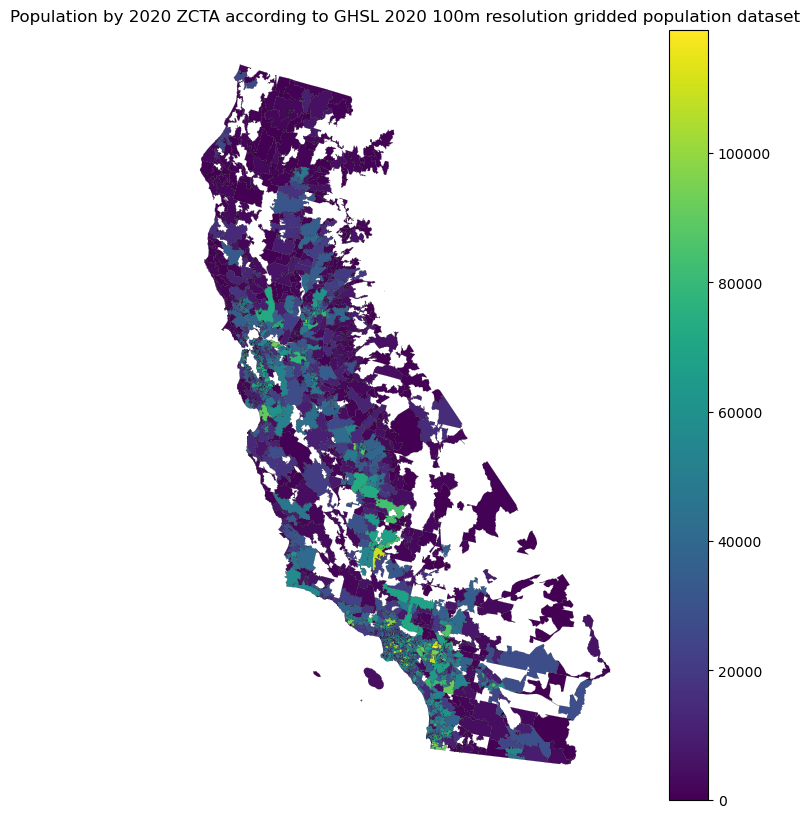

In [32]:
fig, ax = plt.subplots(figsize=(10, 10))
zctas_ca.plot(column='num_people_affected', ax=ax, legend=True, cmap='viridis', linewidth=0.1, edgecolor='black')

# Set plot title and labels
ax.set_title('Population by 2020 ZCTA according to GHSL 2020 100m resolution gridded population dataset')
ax.set_axis_off()

plt.show()

In [56]:
la_zctas = zctas_ca[zctas_ca['ID_spatial_unit'].astype(int).between(90000, 91610)]
sf_zctas = zctas_ca[zctas_ca['ID_spatial_unit'].astype(int).between(94000, 94199)]

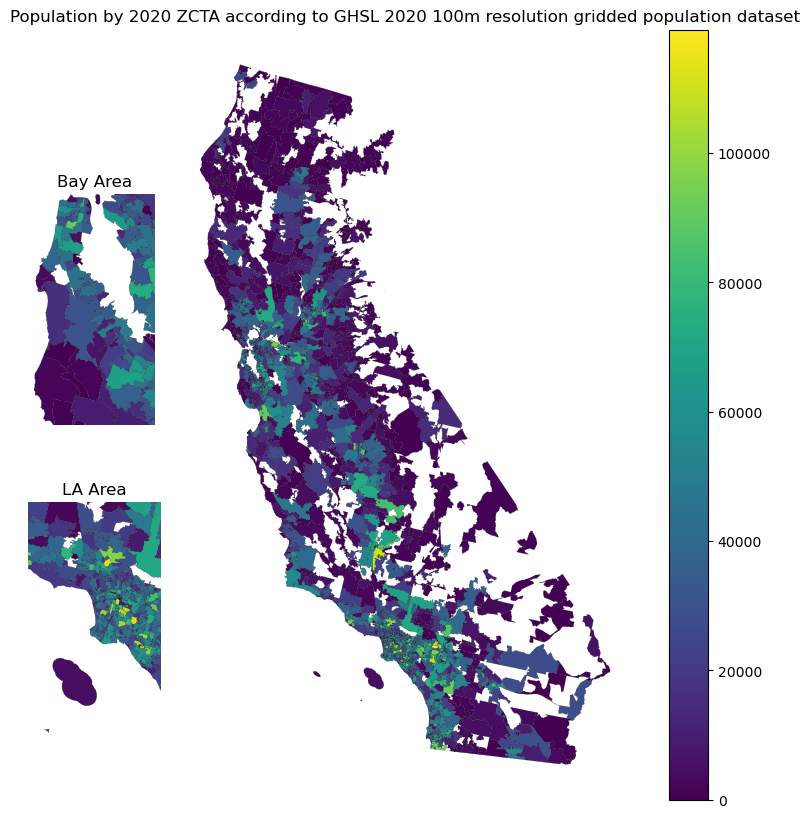

In [58]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fig, ax = plt.subplots(figsize=(10, 10))
zctas_ca.plot(column='num_people_affected', ax=ax, legend=True, cmap='viridis', linewidth=0.1, edgecolor='black')

# Set plot title and labels
ax.set_title('Population by 2020 ZCTA according to GHSL 2020 100m resolution gridded population dataset')
ax.set_axis_off()

# Create an inset map for LA area with adjusted position
ax_inset_la = inset_axes(ax, width="30%", height="30%", loc='lower left', bbox_to_anchor=(-0.4, 0.05, 1, 1), bbox_transform=ax.transAxes, borderpad=2)
zctas_ca.plot(column='num_people_affected', ax=ax_inset_la, cmap='viridis', linewidth=0.1, edgecolor='black')

# Set the extent of the inset map to the bounds of the LA ZCTAs
xmin, ymin, xmax, ymax = la_zctas.total_bounds
ax_inset_la.set_xlim(xmin, xmax)
ax_inset_la.set_ylim(ymin, ymax)

ax_inset_la.set_title('LA Area')
ax_inset_la.set_axis_off()

# Create an inset map for SF area with adjusted position
ax_inset_sf = inset_axes(ax, width="30%", height="30%", loc='lower left', bbox_to_anchor=(-0.4, 0.45, 1, 1), bbox_transform=ax.transAxes, borderpad=2)
zctas_ca.plot(column='num_people_affected', ax=ax_inset_sf, cmap='viridis', linewidth=0.1, edgecolor='black')

# Set the extent of the inset map to the bounds of the SF ZCTAs
xmin, ymin, xmax, ymax = sf_zctas.total_bounds
ax_inset_sf.set_xlim(xmin, xmax)
ax_inset_sf.set_ylim(ymin, ymax)

ax_inset_sf.set_title('Bay Area')
ax_inset_sf.set_axis_off()

plt.show()

In [ ]:
# finally need to read number of people affected by wildfire 



First, we'll plot the wildfire disasters that did occur on top of ZCTA boundaries, then we'll plot the number of people who resided in each ZCTA, and finally we'll plot the number of people affected by a wildfire disaster by ZCTA.

In [ ]:
base_path = pathlib.Path.cwd().parent
data_dir = base_path / "demo_data" 

# read output
wf_by_zcta = pd.read_csv(data_dir / "03_results" / "num_people_affected_by_wildfire.csv")

wf_by_zcta.head()


In [ ]:
# read in raw wildfire dataset 
fires = gpd.read_file(data_dir / "01_raw_data"/ "wildfires_conus.geojson")
# fitler to wildfire states contains 'CA'
fires_ca = fires[(fires['wildfire_states'].str.contains('CA')) & 
                 (fires['wildfire_year'] >= 2015) & 
                 (fires['wildfire_year'] <= 2019)]

fires_ca.plot()

In [ ]:
zctas = gpd.read_file(data_dir / "01_raw_data" / "tl_2020_us_zcta520" / "tl_2020_us_zcta520.shp")
zctas.head()

In [ ]:
# read zctas for plotting
zctas.rename(columns={"ZCTA5CE20": "ID_spatial_unit"}, inplace=True)
zctas = zctas[["ID_spatial_unit", "geometry"]]
zctas.head()



In [ ]:
zctas_ca = zctas[zctas['ID_spatial_unit'].str[:3].astype(int).between(900, 961)]

In [ ]:
zctas_ca.plot()
zctas_ca.boundary.plot()

In [ ]:
# Define the base path and data directory
base_path = pathlib.Path.cwd().parent
data_dir = base_path / "demo_data"

# Read the raw ZCTA data
zctas = gpd.read_file(data_dir / "01_raw_data" / "tl_2020_us_zcta520" / "tl_2020_us_zcta520.shp")

# Filter ZCTAs for California ZIP codes (90xxx to 96xxx)
zctas_ca = zctas[zctas['GEOID20'].str[:3].astype(int).between(900, 961)]

# Read in raw wildfire dataset
fires = gpd.read_file(data_dir / "01_raw_data"/ "wildfires_conus.geojson")

# Filter to wildfires in California that occurred between 2015 and 2019 (inclusive)
fires_ca = fires[(fires['wildfire_states'].str.contains('CA')) & 
                 (fires['wildfire_year'] >= 2015) & 
                 (fires['wildfire_year'] <= 2019)]

zctas_ca = zctas_ca.to_crs(fires_ca.crs)

# Plot the ZCTA boundaries first
fig, ax = plt.subplots(figsize=(10, 10))
zctas_ca.boundary.plot(ax=ax, linewidth=0.5, edgecolor='black', zorder=1)

# Overlay the fire geometries with fill color
fires_ca.plot(ax=ax, color='red', alpha=0.5, edgecolor='red', zorder=2)

# Set plot title and labels
ax.set_title('Wildfire disaster boundaries in CA 2016-2018 on CA ZCTAs')
ax.set_axis_off()
ax.legend()

output_path = data_dir / "03_results" / "wildfire_zcta_plot.pdf"
plt.savefig(output_path, format='pdf', bbox_inches='tight')

plt.show()

In [ ]:
# want to read that file in
num_residing_by_zcta = pd.read_csv(data_dir / "03_results" / "num_people_residing_by_zcta.csv")
num_residing_by_zcta.head()
type(num_residing_by_zcta['ID_spatial_unit'][0])

# # select cols ID spatial unit and num_people_affected
# num_residing_ca = num_residing_ca[["ID_spatial_unit", "num_people_affected"]]

# # merge to zctas_ca
# zctas_ca = zctas_ca.merge(num_residing_ca, on="ID_spatial_unit", how="left")





In [ ]:
zctas_ca.head()

In [ ]:
num_residing_ca = num_residing_by_zcta[num_residing_by_zcta['ID_spatial_unit'].between(90000, 96100)]
num_residing_ca.head()
# convert id spatial unit to string
num_residing_ca['ID_spatial_unit'] = num_residing_ca['ID_spatial_unit'].astype(str)

# # select cols ID spatial unit and num_people_affected
num_residing_ca = num_residing_ca[["ID_spatial_unit", "num_people_affected"]]

# # merge to zctas_ca
zctas_ca = zctas_ca.merge(num_residing_ca, on="ID_spatial_unit", how="left")


In [ ]:
print(num_residing_by_zcta)

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pathlib
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
from rasterio.warp import calculate_default_transform, reproject, Resampling


In [ ]:
# Define the base path and data directory
base_path = pathlib.Path.cwd().parent
data_dir = base_path / "demo_data"

# Read the raw ZCTA data
zctas = gpd.read_file(data_dir / "01_raw_data" / "tl_2020_us_zcta520" / "tl_2020_us_zcta520.shp")

# Filter ZCTAs for California ZIP codes (90xxx to 96xxx)
zctas_ca = zctas[zctas['GEOID20'].str[:3].astype(int).between(900, 961)]


In [ ]:
with rasterio.open(raster_path) as src:
    out_image, out_transform = mask(src, zctas_ca.geometry, crop=True)
    out_meta = src.meta.copy()
# Calculate the bounds of the masked raster
left, bottom, right, top = out_transform * (0, 0), out_transform * (out_image.shape[2], out_image.shape[1])

# Reproject the masked raster to the Albers Equal Area CRS
albers_crs = "EPSG:5070"
transform, width, height = calculate_default_transform(
    raster_crs, albers_crs, right - left, top - bottom, left, bottom, right, top)
kwargs = out_meta.copy()
kwargs.update({
    'crs': albers_crs,
    'transform': transform,
    'width': width,
    'height': height
})

reprojected_image = np.empty((out_image.shape[0], height, width), dtype=out_image.dtype)

for i in range(out_image.shape[0]):
    reproject(
        source=out_image[i],
        destination=reprojected_image[i],
        src_transform=out_transform,
        src_crs=raster_crs,
        dst_transform=transform,
        dst_crs=albers_crs,
        resampling=Resampling.nearest
    )

# Plot the reprojected masked raster values within each ZCTA
fig, ax = plt.subplots(figsize=(10, 10))
show(reprojected_image, transform=transform, ax=ax, cmap='viridis')
zctas_ca.to_crs(albers_crs).boundary.plot(ax=ax, linewidth=0.5, edgecolor='blue')

# Set plot title and labels
ax.set_title('Masked Raster Values within California ZCTAs (Albers Equal Area)')
ax.set_axis_off()

plt.show()

In [ ]:
type(out_meta)

In [ ]:
# Reproject the masked raster to the Albers Equal Area CRS
albers_crs = "EPSG:5070"
transform, width, height = calculate_default_transform(
    raster_crs, albers_crs, out_image.shape[2], out_image.shape[1], *out_transform.bounds)
kwargs = out_meta.copy()
kwargs.update({
    'crs': albers_crs,
    'transform': transform,
    'width': width,
    'height': height
})

In [ ]:
print(zctas_ca.crs)
print(raster_crs)

In [ ]:
# Mask the raster with the ZCTAs
with rasterio.open(raster_path) as src:
    out_image, out_transform = mask(src, zctas_ca.geometry, crop=True)
    out_meta = src.meta.copy()

# Update the metadata with the new dimensions, transform, and CRS
out_meta.update({
    "driver": "GTiff",
    "height": out_image.shape[1],
    "width": out_image.shape[2],
    "transform": out_transform,
    "crs": raster_crs
})

# Plot the masked raster values within each ZCTA
fig, ax = plt.subplots(figsize=(10, 10))
show(out_image, transform=out_transform, ax=ax, cmap='viridis')
zctas_ca.boundary.plot(ax=ax, linewidth=0.5, edgecolor='blue')

# Set plot title and labels
ax.set_title('Masked Raster Values within California ZCTAs')
ax.set_axis_off()

plt.show()

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pathlib
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
from rasterio.warp import calculate_default_transform, reproject, Resampling

# Define the base path and data directory
base_path = pathlib.Path.cwd().parent
data_dir = base_path / "demo_data"

# Read the raw ZCTA data
zctas = gpd.read_file(data_dir / "01_raw_data" / "tl_2020_us_zcta520" / "tl_2020_us_zcta520.shp")

# Filter ZCTAs for California ZIP codes (90xxx to 96xxx)
zctas_ca = zctas[zctas['GEOID20'].str[:3].astype(int).between(900, 961)]

# Read the raster data
raster_path = data_dir / "01_raw_data" / "GHS_POP_E2020_GLOBE_R2023A_54009_100_V1_0.tif"
with rasterio.open(raster_path) as src:
    raster_crs = src.crs  # Get the raster CRS

# Convert the ZCTAs to the raster CRS
zctas_ca = zctas_ca.to_crs(raster_crs)

# Mask the raster with the ZCTAs
with rasterio.open(raster_path) as src:
    out_image, out_transform = mask(src, zctas_ca.geometry, crop=True)
    out_meta = src.meta.copy()

# Update the metadata with the new dimensions, transform, and CRS
out_meta.update({
    "driver": "GTiff",
    "height": out_image.shape[1],
    "width": out_image.shape[2],
    "transform": out_transform,
    "crs": raster_crs
})

# Reproject the masked raster to the Albers Equal Area CRS
albers_crs = "EPSG:5070"
transform, width, height = calculate_default_transform(
    raster_crs, albers_crs, out_image.shape[2], out_image.shape[1], *out_transform.bounds)
kwargs = out_meta.copy()
kwargs.update({
    'crs': albers_crs,
    'transform': transform,
    'width': width,
    'height': height
})

reprojected_image = np.empty((out_image.shape[0], height, width), dtype=out_image.dtype)

for i in range(out_image.shape[0]):
    reproject(
        source=out_image[i],
        destination=reprojected_image[i],
        src_transform=out_transform,
        src_crs=raster_crs,
        dst_transform=transform,
        dst_crs=albers_crs,
        resampling=Resampling.nearest
    )

# Plot the reprojected masked raster values within each ZCTA
fig, ax = plt.subplots(figsize=(10, 10))
show(reprojected_image, transform=transform, ax=ax, cmap='viridis')
zctas_ca.to_crs(albers_crs).boundary.plot(ax=ax, linewidth=0.5, edgecolor='blue')

# Set plot title and labels
ax.set_title('Masked Raster Values within California ZCTAs (Albers Equal Area)')
ax.set_axis_off()

plt.show()

In [ ]:





# Read the raster data
raster_path = data_dir / "01_raw_data" / "GHS_POP_E2020_GLOBE_R2023A_54009_100_V1_0.tif"
with rasterio.open(raster_path) as src:
    # Mask the raster with the ZCTAs
    out_image, out_transform = mask(src, zctas_ca.geometry, crop=True)
    out_meta = src.meta.copy()

# Update the metadata with the new dimensions, transform, and CRS
out_meta.update({
    "driver": "GTiff",
    "height": out_image.shape[1],
    "width": out_image.shape[2],
    "transform": out_transform,
    "crs": src.crs
})

# Plot the masked raster values within each ZCTA
fig, ax = plt.subplots(figsize=(10, 10))
show(out_image, transform=out_transform, ax=ax, cmap='viridis')
zctas_ca.boundary.plot(ax=ax, linewidth=0.5, edgecolor='blue')

# Set plot title and labels
ax.set_title('Masked Raster Values within California ZCTAs')
ax.set_axis_off()

plt.show()

In [ ]:
# set both zctas and fires to albers equal area
zctas_ca = zctas_ca.to_crs(fires_ca.crs)



In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
zctas_ca.boundary.plot(ax=ax, linewidth=0.5, edgecolor='blue', label='ZCTA Boundaries')

# Overlay the fire geometries
fires_ca.plot(ax=ax, color='red', label='Fire Boundaries')

# Set plot title and labels
ax.set_title('California ZCTAs with Fire Boundaries')
ax.set_axis_off()
ax.legend()

plt.show()


#fig, ax = plt.subplots(figsize=(10, 10))
# ax = zctas_ca.boundary.plot(linewidth=0.5, edgecolor='k', label='ZCTA Boundaries')  # Plot ZCTA boundaries
# fires_ca.boundary.plot(ax=ax, linewidth=1, edgecolor='red', alpha=0.5, label='Fire Boundaries')  # Overlay fire boundaries with transparency

# # Set plot title and labels
# ax.set_title('California ZCTAs with Fire Boundaries')
# ax.set_axis_off()
# ax.legend()


In [ ]:
zctas = gpd.read_file(data_dir / "01_raw_data" / "tl_2020_us_zcta520" / "tl_2020_us_zcta520.shp")
